# Lung Cancer Detection Project

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [68]:
import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [2]:
lung_df=pd.read_csv("survey lung cancer.csv")

In [3]:
lung_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
lung_df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [10]:
lung_df["GENDER"]=lung_df["GENDER"].astype("category")

In [16]:
lung_df["GENDER"] = pd.Categorical(lung_df["GENDER"]).codes

In [19]:
lung_df["LUNG_CANCER"]=lung_df["LUNG_CANCER"].astype("category")
lung_df["LUNG_CANCER"] = pd.Categorical(lung_df["LUNG_CANCER"]).codes

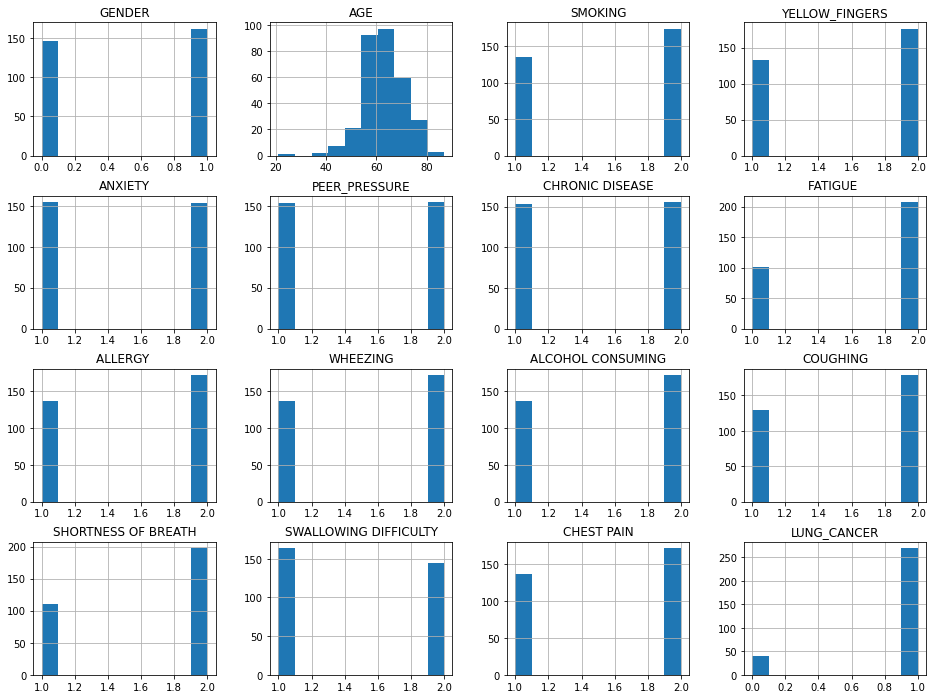

In [26]:
lung_df.hist(figsize=(16,12));

In [31]:
lung_df.mean()

GENDER                    0.524272
AGE                      62.673139
SMOKING                   1.563107
YELLOW_FINGERS            1.569579
ANXIETY                   1.498382
PEER_PRESSURE             1.501618
CHRONIC DISEASE           1.504854
FATIGUE                   1.673139
ALLERGY                   1.556634
WHEEZING                  1.556634
ALCOHOL CONSUMING         1.556634
COUGHING                  1.579288
SHORTNESS OF BREATH       1.640777
SWALLOWING DIFFICULTY     1.469256
CHEST PAIN                1.556634
LUNG_CANCER               0.873786
dtype: float64

In [32]:
lung_df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


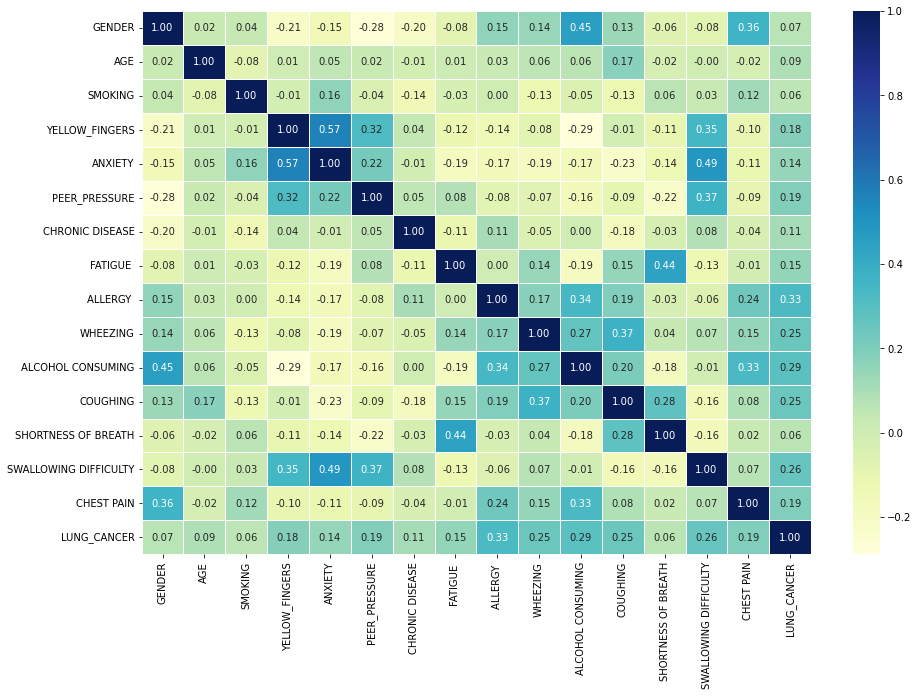

In [34]:
corr_matrix=lung_df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

## Model Construction

In [36]:
X=lung_df.drop("LUNG_CANCER",axis=1)
y=lung_df["LUNG_CANCER"]

In [39]:
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
models_dict={"Linear_SVC": LinearSVC(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "SVC": SVC(),
            "RandomForestClassifier": RandomForestClassifier(),
             "LogisticRegression": LogisticRegression(),
            "AdaBoost":AdaBoostClassifier(),
            "GradientBoosting":GradientBoostingClassifier()}

In [42]:
def fit_and_score_models(models,X_train,y_train,X_test,y_test):
    """
    Fits and evaluates a machine learning model using sklearn's .fit() and .score() functions.
    models=dictionary of model names and model functions(according to sklearn's standard nomenclature)
    X_train=Pandas DataFrame used for fitting the model(given variables)
    y_train=Pandas DataFrame used for fitting the model(target)
    X_test=Pandas DataFrame used for evaluating the model
    y_test=Pandas DataFrame used for evaluating the model
    """
    results={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = model.score(X_test, y_test)
    return results

In [45]:
results=fit_and_score_models(models_dict,X_train,y_train,X_test,y_test)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1],reverse=1)}
print("6 Most Promising Models:\n",list(results.items())[0],"\n",list(results.items())[1],"\n",list(results.items())[2],"\n",list(results.items())[3],"\n",list(results.items())[4],"\n",list(results.items())[5])

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6 Most Promising Models:
 ('LogisticRegression', 0.967741935483871) 
 ('AdaBoost', 0.967741935483871) 
 ('GradientBoosting', 0.967741935483871) 
 ('KNeighborsClassifier', 0.9516129032258065) 
 ('RandomForestClassifier', 0.9516129032258065) 
 ('Linear_SVC', 0.9032258064516129)


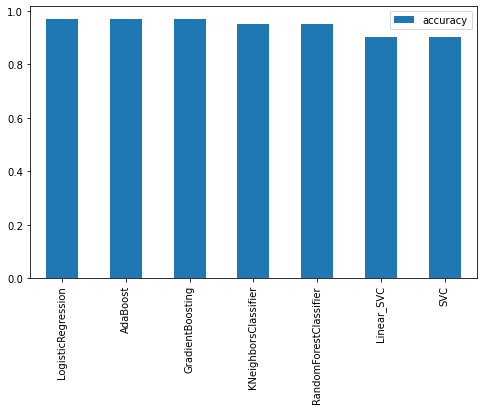

In [46]:
results_df=pd.DataFrame.from_dict(results, orient='index',columns=['accuracy'])
results_df.plot.bar(figsize=(8,5));

## Tuning Hyperparameters

### LogisticRegression

In [49]:
log_reg_grid = {"C": np.logspace(-4,3,5,10,20),"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],"penalty":["none","l1","l2","elasticnet"]}

In [50]:
rs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=2)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=6.25e-06, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .........C=6.25e-06, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=6.25e-06, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .........C=6.25e-06, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .............C=6.25e-06, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .............C=6.25e-06, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to 

[CV] END .............C=6.25e-06, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .............C=6.25e-06, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to 

[CV] END .............C=6.25e-06, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=none, solver=sag; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=none, solver=sag; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=none, solver=sag; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=none, solver=sag; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=none, solver=sag; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit

[CV] END ..............C=6.25e-06, penalty=none, solver=saga; total time=   0.0s
[CV] END ..............C=6.25e-06, penalty=none, solver=saga; total time=   0.0s
[CV] END ..............C=6.25e-06, penalty=none, solver=saga; total time=   0.0s
[CV] END ..............C=6.25e-06, penalty=none, solver=saga; total time=   0.0s
[CV] END ..............C=6.25e-06, penalty=none, solver=saga; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=6.

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer

[CV] END ...........C=6.25e-06, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=6.25e-06, penalty=l1, solver=sag; total time=   0.0s
[CV] END .................C=6.25e-06, penalty=l1, solver=sag; total time=   0.0s
[CV] END .................C=6.25e-06, penalty=l1, solver=sag; total time=   0.0s
[CV] END .................C=6.25e-06, penalty=l1, solver=sag; total time=   0.0s
[CV] END .................C=6.25e-06, penalty=l1, solver=sag; total time=   0.0s
[CV] END ................C=6.25e-06, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=6.25e-06, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=6.25e-06, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=6

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model

[CV] END ...........C=6.25e-06, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...............C=6.25e-06, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was rea

[CV] END ................C=6.25e-06, penalty=l2, solver=saga; total time=   0.0s
[CV] END ................C=6.25e-06, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=6.25e-06, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ...C=6.25e-06, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ...C=6.25e-06, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ...C=6.25e-06, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ...C=6.25e-06, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=6.25e-06, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......C=6.25e-06, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......C=6.25e-06, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......C=6.25e-06, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......C=6.25e-06, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...C=6.25e-06, pena

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages

[CV] END ........C=6.25e-06, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0011821770112539697, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0011821770112539697, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0011821770112539697, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0011821770112539697, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to 

[CV] END C=0.0011821770112539697, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to 

[CV] END C=0.0011821770112539697, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=none, solver=sag; total time=   0.0s
[CV] END .C=0.0011821770112539697, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=0.0011821770112539697, penalty=none, solver=saga; total time=   0.0s

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer


[CV] END .C=0.0011821770112539697, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=0.0011821770112539697, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=0.0011821770112539697, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.00

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model

[CV] END ....C=0.0011821770112539697, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....C=0.0011821770112539697, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....C=0.0011821770112539697, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....C=0.0011821770112539697, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...C=0.0011821770112539697, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.0011821770112539697, penalty=l1, solver=saga; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ...C=0.0011821770112539697, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.0011821770112539697, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.0011821770112539697, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0011821770112539697, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.001

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' p

[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0011821770112539697, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.001182

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model

[CV] END C=0.22360679774997896, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.22360679774997896, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.22360679774997896, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none'

[CV] END ..C=0.22360679774997896, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.22360679774997896, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.22360679774997896, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mo

[CV] END ..C=0.22360679774997896, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.22360679774997896, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=0.22360679774997896, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=0.22360679774997896, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=0.22360679774997896, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=0.22360679774997896, penalty=none, solver=sag; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit

[CV] END ....C=0.22360679774997896, penalty=none, solver=sag; total time=   0.0s
[CV] END ...C=0.22360679774997896, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=0.22360679774997896, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=0.22360679774997896, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=0.22360679774997896, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=0.22360679774997896, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.22360679774997896, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.22360679774

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be 

[CV] END C=0.22360679774997896, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.22360679774997896, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.22360679774997896, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.22360679774997896, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.22360679774997896, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.22360679774997896, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....C=0.22360679774997896, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.22360679774997896, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.22360679774997896, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.22360679774997896, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.2236067977

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.22360679774997896, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.22360679774997896, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.22360679774997896, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.22360679774997896, penalty=l2, solver=lbfgs; total time=   0.0s

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n


[CV] END ....C=0.22360679774997896, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.22360679774997896, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was rea

[CV] END ......C=0.22360679774997896, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=0.22360679774997896, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=0.22360679774997896, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=0.22360679774997896, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=0.22360679774997896, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.22360679774997896, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.22360679774997896, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.22360679774997896, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.22360679774997896, penalty=l2, solver=saga; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' p

[CV] END .....C=0.22360679774997896, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.22360679774997896, penalty=elasticne

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=42.294850537622565, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=42.294850537622565, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=42.294850537622565, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=42.294850537622565, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=42.294850537622565, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to 

[CV] END ...C=42.294850537622565, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=42.294850537622565, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=42.294850537622565, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to 

[CV] END ...C=42.294850537622565, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=42.294850537622565, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=42.294850537622565, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=42.294850537622565, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=42.294850537622565, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=42.294850537622565, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=42.294850537622565, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=42.29485

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was 

[CV] END ....C=42.294850537622565, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=42.294850537622565, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=42.2948505376225

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn

[CV] END .C=42.294850537622565, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=42.294850537622565, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=42.294850537622565, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=42.294850537622565, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=42.294850537622565, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=42.294850537622565, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=42.294850537622565, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=42.294850537622565, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=42.294850537622565, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=42.294850537622565, penalty=l1, solver=saga; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model

[CV] END ......C=42.294850537622565, penalty=l1, solver=saga; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[CV] END .....C=42.294850537622565, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=42.294850537622565, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=42.294850537622565, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=42.294850537622565, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=42.294850537622565, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=42.294850537622565, penalty=l2, solver=sag; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packag

[CV] END .......C=42.294850537622565, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=42.294850537622565, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=42.294850537622565, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=42.294850537622565, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=42.294850537622565, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=42.294850537622565, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=42.294850537622565, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=newton-cg; total time= 

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was rea

[CV] END C=42.294850537622565, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=42.294850537622565, penalty=elasticnet, solver=

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model


[CV] END ...........C=8000.0, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...........C=8000.0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........C=8000.0, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none'

[CV] END ...........C=8000.0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...............C=8000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=8000.0, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mo

[CV] END ...............C=8000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=8000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=8000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...........C=8000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=8000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=8000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=8000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=8000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .................C=8000.0, penalty=none, solver=sag; total time=   0.0s
[CV] END .................C=8000.0, penalty=none, solver=sag; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit

[CV] END .................C=8000.0, penalty=none, solver=sag; total time=   0.0s
[CV] END .................C=8000.0, penalty=none, solver=sag; total time=   0.0s
[CV] END .................C=8000.0, penalty=none, solver=sag; total time=   0.0s
[CV] END ................C=8000.0, penalty=none, solver=saga; total time=   0.0s
[CV] END ................C=8000.0, penalty=none, solver=saga; total time=   0.0s
[CV] END ................C=8000.0, penalty=none, solver=saga; total time=   0.0s
[CV] END ................C=8000.0, penalty=none, solver=saga; total time=   0.0s
[CV] END ................C=8000.0, penalty=none, solver=saga; total time=   0.0s
[CV] END .............C=8000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=8000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=8000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=8000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=8000

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
 

[CV] END .................C=8000.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .............C=8000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=8000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=8000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=8000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=8000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..................C=8000.0, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..................C

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model

[CV] END .............C=8000.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .............C=8000.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .............C=8000.0, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .............C=8000.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .............C=8000.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=8000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=8000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=8000.0, penalty=l2, solver=lbfgs; total time=   0.0s

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n


[CV] END .................C=8000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=8000.0, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[CV] END .............C=8000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=8000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=8000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=8000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=8000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...................C=8000.0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was rea

[CV] END ..................C=8000.0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..................C=8000.0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..................C=8000.0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..................C=8000.0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..................C=8000.0, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=8000.0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .....C=8000.0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .....C=8000.0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .....C=8000.0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .....C=8000.0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=8000.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .........C=8000.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .........C=8000.0, 

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' p

[CV] END ...........C=8000.0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...........C=8000.0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...........C=8000.0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...........C=8000.0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...........C=8000.0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..........C=8000.0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..........C=8000.0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..........C=8000.0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..........C=8000.0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..........C=8000.0, penalty=elasticnet, solver=saga; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([6.25000000e-06, 1.18217701e-03, 2.23606798e-01, 4.22948505e+01,
       8.00000000e+03]),
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [52]:
rs_log_reg.best_params_

{'C': 42.294850537622565, 'penalty': 'l2', 'solver': 'liblinear'}

In [53]:
rs_log_reg.score(X_test,y_test)

0.967741935483871

### AdaBoost

In [54]:
log_reg_grid ={'n_estimators':[10,20,50,100,200,500],'algorithm':['SAMME', 'SAMME.R']}

In [58]:
rs_log_reg = GridSearchCV(estimator=AdaBoostClassifier(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=2)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................algorithm=SAMME, n_estimators=10; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=10; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=10; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=10; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=10; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=20; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=20; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=20; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=20; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=20; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_e

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [10, 20, 50, 100, 200, 500]},
             verbose=2)

In [59]:
rs_log_reg.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 100}

In [60]:
rs_log_reg.score(X_test,y_test)

0.967741935483871

### Gradient Boosting

In [62]:
log_reg_grid ={'loss':['log_loss', 'deviance', 'exponential'], 'learning_rate':[0,0.1,0.2,0.5,1,10,100], 'n_estimators':[10,20,30,50,100,200,500], 'criterion':['friedman_mse', 'squared_error', 'mse']}

In [63]:
rs_log_reg = GridSearchCV(estimator=GradientBoostingClassifier(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=2)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 441 candidates, totalling 2205 fits
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=100; tota

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=20; total t

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=deviance, n_estimators=100; total

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponenti

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, 

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, n_esti

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_esti

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=log_los

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, n

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=friedman_mse, learning_rate=1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, n_estimators=20; total 

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=log_loss, n_estim

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=10, loss=deviance, n_estimators=30;

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test


[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=100, loss=devianc

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=log_loss, n_estim

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=50;

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=squared_error, learning_rate=0, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=e

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=l

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=20; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=30; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=50; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, lea

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_e

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=10; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=20; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=30; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=30; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=100; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=20; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=20; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=20; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=30; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=50; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=200; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=500; total time=   0.0s

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput


[CV] END criterion=squared_error, learning_rate=0.2, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, lear

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, lea

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.2, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_e

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_lo

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, lo

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=devian

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, lea

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.5, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_e

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=30;

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=log_loss, n_estim

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=20;

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimator

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponenti

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=1, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rat

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_esti

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=log_los

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_esti

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=200; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=expon

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rat

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=10, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learn

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_lo

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput


[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=devia

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, lo

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=20; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=50; total time=   0.0s


C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Komput

[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, lear

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=30; total t

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=log_loss, n_estimators=5

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=50; total t

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=deviance, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimator

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=expo

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0, loss=exponential, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=50; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=devia

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.2, loss=de

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=lo

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.5, loss=deviance, n_

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=mse, learning_rate=1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=1, loss=deviance, n_estimators=10

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=10, loss=log_loss, n_e

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=100; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=200; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=log_loss, n_estimators=500; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=lo

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test

[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_estimators=30; total time=   0.0s
[CV] END criterion=mse, learning_rate=100, loss=deviance, n_

C:\Users\Komputer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.88661224 0.87844898
 0.88244898 0.88261224 0.89061224 0.87853061 0.87061224 0.86644898
 0.88253061 0.86636735 0.88661224 0.89469388 0.87861224 0.87861224
        nan        nan        nan        nan        nan        nan
        nan 0.87436735 0.88661224 0.89061224 0.88661224 0.87461224
 0.89869388 0.86661224 0.87453061 0.89061224 0.87861224 0.89069388
 0.87853061 0.87461224 0.87861224        nan        nan        nan
        nan        nan        nan        nan 0.88661224 0.89469388
 0.87853061 0.88669388 0.87861224 0.88261224 0.886

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0, 0.1, 0.2, 0.5, 1, 10, 100],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [10, 20, 30, 50, 100, 200, 500]},
             verbose=2)

In [64]:
rs_log_reg.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'exponential',
 'n_estimators': 20}

In [65]:
rs_log_reg.score(X_test,y_test)

0.967741935483871

## Intermidiate Conclusions

Even with tuning of the hyperparameters all of the models give the sam accuracy score as such we will choose Logistic Regression due to it being seemingly the fastest of the top 3 algorithms

## Evaluation of the Logistic Regression

In [66]:
clf=LogisticRegression()

In [69]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.967741935483871

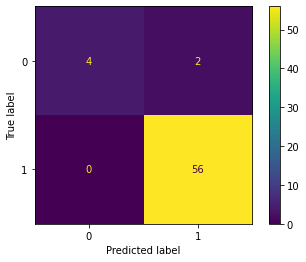

In [70]:
y_preds=clf.predict(X_test)
clf_matrix=confusion_matrix(y_true=y_test,y_pred=y_preds)
display_matrix=ConfusionMatrixDisplay(confusion_matrix=clf_matrix,display_labels=clf.classes_)
display_matrix.plot();

In [71]:
print(classification_report(y_true=y_test,y_pred=y_preds))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.97      1.00      0.98        56

    accuracy                           0.97        62
   macro avg       0.98      0.83      0.89        62
weighted avg       0.97      0.97      0.96        62



In [72]:
precision_score(y_test,y_preds)

0.9655172413793104

In [73]:
recall_score(y_test,y_preds)

1.0

In [74]:
f1_score(y_test,y_preds)

0.9824561403508771

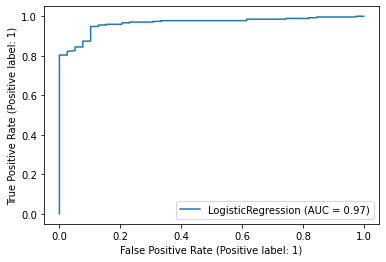

In [75]:
plot_roc_curve(clf,X,y);

In [76]:
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.91935484, 0.90322581, 0.93548387, 0.88709677, 0.93442623])

In [77]:
cross_val_precision=np.mean(cross_val_score(clf,X,y,scoring="precision",cv=5))
cross_val_precision

0.9327722363814546

In [78]:
cross_val_recall=np.mean(cross_val_score(clf,X,y,scoring="recall",cv=5))
cross_val_recall

0.9740740740740741

In [79]:
cross_val_F1=np.mean(cross_val_score(clf,X,y,scoring="f1",cv=5))
cross_val_F1

0.952712073646653

## Feature Importance of Logistic Regression

In [81]:
feature_dict=dict(zip(lung_df.columns,list(clf.coef_[0])))
feature_dict

{'GENDER': -0.33002730701124317,
 'AGE': 0.030221381213162816,
 'SMOKING': 0.8582429062481496,
 'YELLOW_FINGERS': 1.2448216764049027,
 'ANXIETY': 0.48444145566885666,
 'PEER_PRESSURE': 0.9225760085147836,
 'CHRONIC DISEASE': 1.4040209343438992,
 'FATIGUE ': 1.2078222874308169,
 'ALLERGY ': 1.210123289579984,
 'WHEEZING': 0.6369146085355327,
 'ALCOHOL CONSUMING': 1.2448465451603017,
 'COUGHING': 1.2855743342062214,
 'SHORTNESS OF BREATH': -0.0064324500076533685,
 'SWALLOWING DIFFICULTY': 1.264074840412566,
 'CHEST PAIN': 0.41013908223537676}

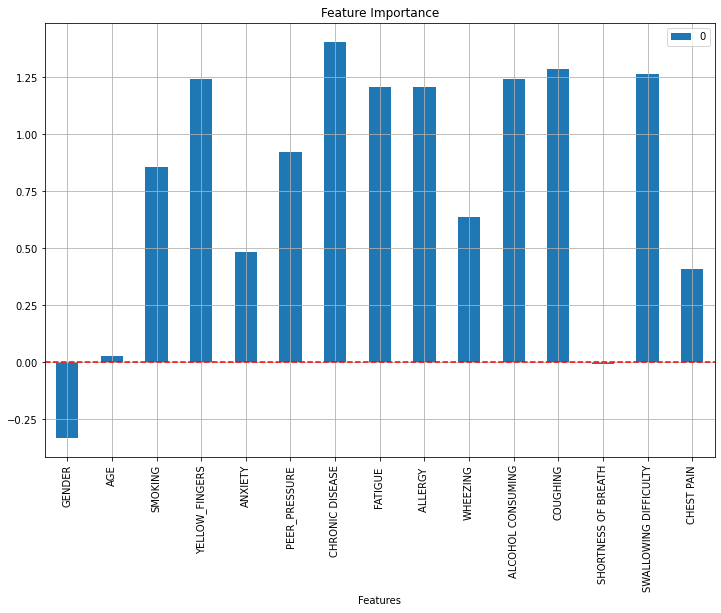

In [82]:
results_df=pd.DataFrame.from_dict(feature_dict, orient='index')
ax=results_df.plot.bar(figsize=(12,8));
ax.axhline(y=0,linestyle="--",color='r');
ax.grid();
ax.set(title="Feature Importance",xlabel="Features");